# Prevendo resultados de jogos da fase de grupos da Copa do Mundo Fifa 2022 utilizando Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importação de bibliotecas
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Upload do dataset (Web scraping de ranking Fifa e todos os jogos desde 1930)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio/Worldcup/dataset-completo.csv', sep=";")

In [ ]:
df.shape

(900, 12)

In [ ]:
df.head()

,Year,Datetime,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede
0,1930,13-Jul-30,15:00,Group 1,France,4,1,Mexico,NaN,NaN,no,no
1,1930,13-Jul-30,15:00,Group 4,USA,3,0,Belgium,NaN,NaN,no,no
2,1930,14-Jul-30,12:45,Group 2,Yugoslavia,2,1,Brazil,NaN,NaN,no,no
3,1930,14-Jul-30,14:50,Group 3,Romania,3,1,Peru,NaN,NaN,no,no
4,1930,15-Jul-30,16:00,Group 1,Argentina,1,0,France,NaN,NaN,no,no


In [ ]:
# Inserção de quantidade de títulos por países

'''Brasil: 5 títulos (1958, 1962, 1970, 1994 e 2002)
Alemanha: 4 títulos (1954, 1974, 1990 e 2014)
Itália: 4 títulos (1934, 1938, 1982 e 2006)
Argentina: 2 títulos (1978 e 1986)
Uruguai: 2 títulos (1930 e 1950)
França: 2 títulos (1998 e 2018)
Espanha: 1 título (2010)
Inglaterra: 1 título (1966)'''

titulos_home = []

for i in df['Home Team Name']:
    if i == 'Brazil':
        titulos_home.append(5)
    elif i == 'Germany':
        titulos_home.append(4)
    elif i == 'Italy':
        titulos_home.append(4)
    elif i == 'Argentina':
        titulos_home.append(2)
    elif i == 'Uruguay':
        titulos_home.append(2)
    elif i == 'France':
        titulos_home.append(2)
    elif i == 'Spain':
        titulos_home.append(1)
    elif i == 'England':
        titulos_home.append(1)
    else:
        titulos_home.append(0)
        
titulos_away = []

for i in df['Away Team Name']:
    if i == 'Brazil':
        titulos_away.append(5)
    elif i == 'Germany':
        titulos_away.append(4)
    elif i == 'Italy':
        titulos_away.append(4)
    elif i == 'Argentina':
        titulos_away.append(2)
    elif i == 'Uruguay':
        titulos_away.append(2)
    elif i == 'France':
        titulos_away.append(2)
    elif i == 'Spain':
        titulos_away.append(1)
    elif i == 'England':
        titulos_away.append(1)
    else:
        titulos_away.append(0)
  
df['Titles_Home'] = titulos_home
df['Titles_Away'] = titulos_away

In [ ]:
df.isnull().sum()

Year                 0
Datetime             0
Time                 0
Stage                0
Home Team Name       0
Home Team Goals      0
Away Team Goals      0
Away Team Name       0
HTRanking          465
ATRanking          464
HTSede             296
ATSede             296
Titles_Home          0
Titles_Away          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             900 non-null    int64  
 1   Datetime         900 non-null    object 
 2   Time             900 non-null    object 
 3   Stage            900 non-null    object 
 4   Home Team Name   900 non-null    object 
 5   Home Team Goals  900 non-null    int64  
 6   Away Team Goals  900 non-null    int64  
 7   Away Team Name   900 non-null    object 
 8   HTRanking        435 non-null    float64
 9   ATRanking        436 non-null    float64
 10  HTSede           604 non-null    object 
 11  ATSede           604 non-null    object 
 12  Titles_Home      900 non-null    int64  
 13  Titles_Away      900 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 98.6+ KB


In [ ]:
df.head()

,Year,Datetime,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away
0,1930,13-Jul-30,15:00,Group 1,France,4,1,Mexico,NaN,NaN,no,no,2,0
1,1930,13-Jul-30,15:00,Group 4,USA,3,0,Belgium,NaN,NaN,no,no,0,0
2,1930,14-Jul-30,12:45,Group 2,Yugoslavia,2,1,Brazil,NaN,NaN,no,no,0,5
3,1930,14-Jul-30,14:50,Group 3,Romania,3,1,Peru,NaN,NaN,no,no,0,0
4,1930,15-Jul-30,16:00,Group 1,Argentina,1,0,France,NaN,NaN,no,no,2,2


In [ ]:
# Visualização de valores do Stage

print(df['Stage'].nunique())
print(df['Stage'].value_counts())

30
Round of 16                 64
Group 1                     62
Quarter-finals              62
Group B                     60
Group A                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group E                     48
Group F                     48
Group C                     48
Group D                     48
Semi-finals                 34
Group H                     30
Group G                     30
Final                       20
Group-1                     16
Group-2                     16
Group-3                     16
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Last-16                      8
Group 5                      6
QFinals                      4
SFinals                      2
Third place                  2
Play-off for third place     1
Third-Place                  1
Name: Stage, dtype: int64


In [ ]:
# Padronização de valores

df['Stage'] = df['Stage'].str.replace('Third place','Match for third place')
df['Stage'] = df['Stage'].str.replace('Third-Place','Match for third place')
df['Stage'] = df['Stage'].str.replace('Play-off for third place','Match for third place')
df['Stage'] = df['Stage'].str.replace('QFinals','Quarter-finals').str.replace('SFinals','Semi-finals')
df['Stage'] = df['Stage'].str.replace('Group 1','Group A').str.replace('Group 2','Group B').str.replace('Group 3','Group C').str.replace('Group 4','Group D')
df['Stage'] = df['Stage'].str.replace('Group-1','Group A').str.replace('Group-2','Group B').str.replace('Group-3','Group C')
df['Stage'] = df['Stage'].str.replace('Group 5','Group E').str.replace('Group 6','Group F')
df['Stage'] = df['Stage'].str.replace('Preliminary round','Group Phase').str.replace('First round','Group Phase')
df['Stage'] = df['Stage'].str.replace('Group A','Group Phase').str.replace('Group B','Group Phase').str.replace('Group C','Group Phase').str.replace('Group D','Group Phase')
df['Stage'] = df['Stage'].str.replace('Group E','Group Phase').str.replace('Group F','Group Phase').str.replace('Group G','Group Phase').str.replace('Group H','Group Phase')
df['Home Team Name'] = df['Home Team Name'].str.replace('Northern Ireland','Republic of Ireland')
df['Away Team Name'] = df['Away Team Name'].str.replace('Northern Ireland','Republic of Ireland')

In [ ]:
print(df['Stage'].nunique())
print(df['Stage'].value_counts())

7
Group Phase              687
Quarter-finals            66
Round of 16               64
Semi-finals               36
Final                     20
Match for third place     19
Last-16                    8
Name: Stage, dtype: int64


In [ ]:
# Criação das colunas de diferença de gols entre Home Team e Away Team

df['HTG-Diff'] = df['Home Team Goals'] - df['Away Team Goals']
df['ATG-Diff'] = df['Away Team Goals'] - df['Home Team Goals']

In [ ]:
df.head()

,Year,Datetime,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff
0,1930,13-Jul-30,15:00,Group Phase,France,4,1,Mexico,NaN,NaN,no,no,2,0,3,-3
1,1930,13-Jul-30,15:00,Group Phase,USA,3,0,Belgium,NaN,NaN,no,no,0,0,3,-3
2,1930,14-Jul-30,12:45,Group Phase,Yugoslavia,2,1,Brazil,NaN,NaN,no,no,0,5,1,-1
3,1930,14-Jul-30,14:50,Group Phase,Romania,3,1,Peru,NaN,NaN,no,no,0,0,2,-2
4,1930,15-Jul-30,16:00,Group Phase,Argentina,1,0,France,NaN,NaN,no,no,2,2,1,-1


In [ ]:
# Inserção de resultados de partidas por Home e Away

resultado = []

for i in df['HTG-Diff']:
    if i == 0:
        resultado.append('Draw')
    elif i > 0:
        resultado.append('Won')
    else:
        resultado.append('Lost')
        
resultado_away = []

for i in df['ATG-Diff']:
    if i == 0:
        resultado_away.append('Draw')
    elif i > 0:
        resultado_away.append('Won')
    else:
        resultado_away.append('Lost')

In [ ]:
df['Resultado_Home'] = resultado
df['Resultado_Away'] = resultado_away

In [ ]:
df

,Year,Datetime,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff,Resultado_Home,Resultado_Away
0,1930,13-Jul-30,15:00,Group Phase,France,4,1,Mexico,NaN,NaN,no,no,2,0,3,-3,Won,Lost
1,1930,13-Jul-30,15:00,Group Phase,USA,3,0,Belgium,NaN,NaN,no,no,0,0,3,-3,Won,Lost
2,1930,14-Jul-30,12:45,Group Phase,Yugoslavia,2,1,Brazil,NaN,NaN,no,no,0,5,1,-1,Won,Lost
3,1930,14-Jul-30,14:50,Group Phase,Romania,3,1,Peru,NaN,NaN,no,no,0,0,2,-2,Won,Lost
4,1930,15-Jul-30,16:00,Group Phase,Argentina,1,0,France,NaN,NaN,no,no,2,2,1,-1,Won,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,07/07/18,18:00,Quarter-finals,Sweden,0,2,England,24.0,12.0,no,no,0,1,-2,2,Lost,Won
896,2018,10/07/18,21:00,Semi-finals,France,1,0,Belgium,7.0,3.0,no,no,2,0,1,-1,Won,Lost
897,2018,11/07/18,21:00,Semi-finals,Croatia,2,1,England,20.0,12.0,no,no,0,1,1,-1,Won,Lost
898,2018,14/07/18,17:00,Match for third place,Belgium,2,0,England,3.0,12.0,no,no,0,1,2,-2,Won,Lost


In [ ]:
df['Time'] = df['Time'].str.replace(':','').astype(float)

In [ ]:
df

,Year,Datetime,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff,Resultado_Home,Resultado_Away
0,1930,13-Jul-30,1500.0,Group Phase,France,4,1,Mexico,NaN,NaN,no,no,2,0,3,-3,Won,Lost
1,1930,13-Jul-30,1500.0,Group Phase,USA,3,0,Belgium,NaN,NaN,no,no,0,0,3,-3,Won,Lost
2,1930,14-Jul-30,1245.0,Group Phase,Yugoslavia,2,1,Brazil,NaN,NaN,no,no,0,5,1,-1,Won,Lost
3,1930,14-Jul-30,1450.0,Group Phase,Romania,3,1,Peru,NaN,NaN,no,no,0,0,2,-2,Won,Lost
4,1930,15-Jul-30,1600.0,Group Phase,Argentina,1,0,France,NaN,NaN,no,no,2,2,1,-1,Won,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,07/07/18,1800.0,Quarter-finals,Sweden,0,2,England,24.0,12.0,no,no,0,1,-2,2,Lost,Won
896,2018,10/07/18,2100.0,Semi-finals,France,1,0,Belgium,7.0,3.0,no,no,2,0,1,-1,Won,Lost
897,2018,11/07/18,2100.0,Semi-finals,Croatia,2,1,England,20.0,12.0,no,no,0,1,1,-1,Won,Lost
898,2018,14/07/18,1700.0,Match for third place,Belgium,2,0,England,3.0,12.0,no,no,0,1,2,-2,Won,Lost


In [ ]:
df.drop('Datetime',inplace=True, axis=1)

In [ ]:
resultados_br = df.loc[(df['Away Team Name'] == 'Brazil') | (df['Home Team Name'] == 'Brazil')]

In [ ]:
resultados_br

,Year,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff,Resultado_Home,Resultado_Away
2,1930,1245.0,Group Phase,Yugoslavia,2,1,Brazil,NaN,NaN,no,no,0,5,1,-1,Won,Lost
11,1930,1300.0,Group Phase,Brazil,4,0,Bolivia,NaN,NaN,no,no,5,0,4,-4,Won,Lost
23,1934,1630.0,Group Phase,Spain,3,1,Brazil,NaN,NaN,no,no,1,5,2,-2,Won,Lost
40,1938,1730.0,Group Phase,Brazil,6,5,Poland,NaN,NaN,no,no,5,0,1,-1,Won,Lost
44,1938,1700.0,Quarter-finals,Brazil,1,1,Czechoslovakia,NaN,NaN,no,no,5,0,0,0,Draw,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,2018,2100.0,Group Phase,Brazil,1,1,Switzerland,2.0,6.0,no,no,5,0,0,0,Draw,Draw
859,2018,1500.0,Group Phase,Brazil,2,0,Costa Rica,2.0,23.0,no,no,5,0,2,-2,Won,Lost
876,2018,2100.0,Group Phase,Serbia,0,2,Brazil,34.0,2.0,no,no,0,5,-2,2,Lost,Won
889,2018,1800.0,Last-16,Brazil,2,0,Mexico,2.0,15.0,no,no,5,0,2,-2,Won,Lost


In [ ]:
df['Resultado_Home'] = df['Resultado_Home'].replace(['Won','Lost','Draw'],[0,1,2])
df['Resultado_Away'] = df['Resultado_Away'].replace(['Won','Lost','Draw'],[0,1,2])

In [ ]:
df_bora = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             900 non-null    int64  
 1   Time             900 non-null    float64
 2   Stage            900 non-null    object 
 3   Home Team Name   900 non-null    object 
 4   Home Team Goals  900 non-null    int64  
 5   Away Team Goals  900 non-null    int64  
 6   Away Team Name   900 non-null    object 
 7   HTRanking        435 non-null    float64
 8   ATRanking        436 non-null    float64
 9   HTSede           604 non-null    object 
 10  ATSede           604 non-null    object 
 11  Titles_Home      900 non-null    int64  
 12  Titles_Away      900 non-null    int64  
 13  HTG-Diff         900 non-null    int64  
 14  ATG-Diff         900 non-null    int64  
 15  Resultado_Home   900 non-null    int64  
 16  Resultado_Away   900 non-null    int64  
dtypes: float64(3), i

In [ ]:
for i in df_bora:
    if df_bora[i].dtypes == 'object':
        df_bora[i].fillna('nenhum', inplace=True)
    elif df_bora[i].dtypes == 'float64':
        df_bora[i].fillna(0,inplace = True)
        df_bora[i].astype(int)
    else:
        pass

In [ ]:
for i in df_bora:
    if df_bora[i].dtypes == 'float64':
        df_bora[i] = np.array(df_bora[i]).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df_bora:
    if df_bora[i].dtypes == 'object':
        df_bora[i] = encoder.fit_transform(df_bora[i])
    else:
        pass

In [ ]:
from sklearn.preprocessing import Normalizer
norma = Normalizer()

values = Normalizer().fit_transform(df_bora.values)

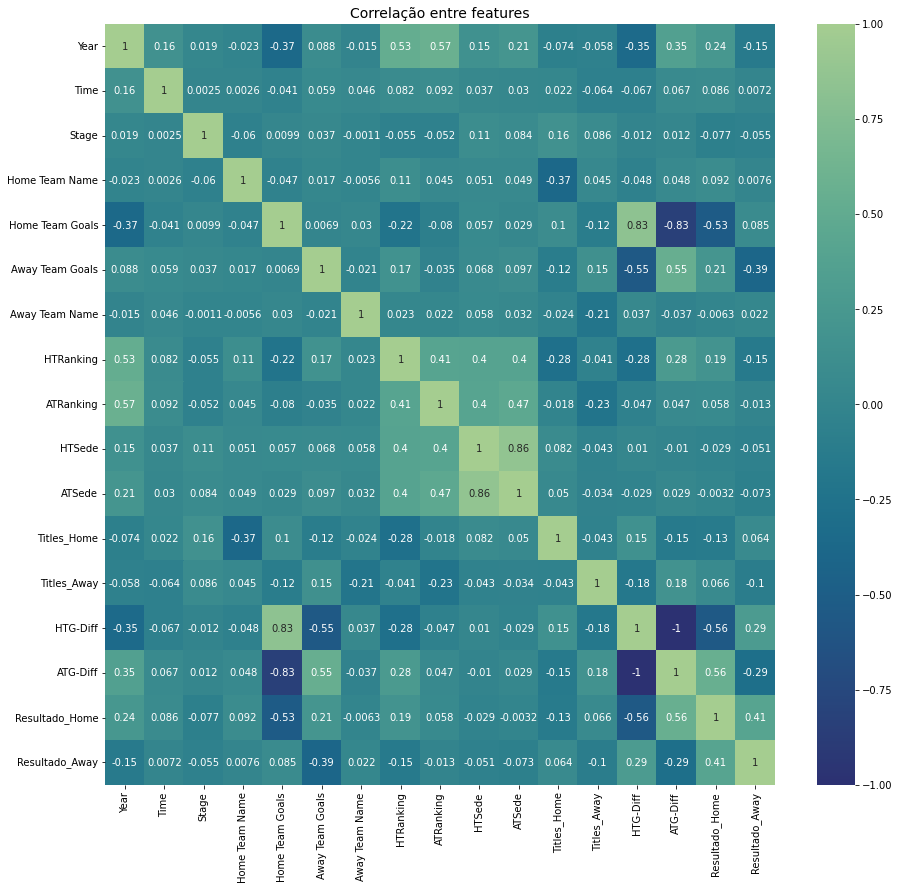

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,14))
sns.heatmap(df_bora.corr(),annot=True,cmap='crest_r')
plt.title('Correlação entre features',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [ ]:
df_bora.head()

,Year,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff,Resultado_Home,Resultado_Away
0,1930,1500,1,24,4,1,47,0,0,1,1,2,0,3,-3,0,1
1,1930,1500,1,73,3,0,5,0,0,1,1,0,0,3,-3,0,1
2,1930,1245,1,77,2,1,8,0,0,1,1,0,5,1,-1,0,1
3,1930,1450,1,54,3,1,55,0,0,1,1,0,0,2,-2,0,1
4,1930,1600,1,2,1,0,26,0,0,1,1,2,2,1,-1,0,1


In [ ]:
# pip install pycaret

In [ ]:
# Utilização de PyCaret para comparar modelos de classificação com variável y = Resultado_Home (Time Home vence, perde ou empata)

from pycaret.classification import *
s = setup(df_bora, target = 'Resultado_Home')

,Description,Value
0,session_id,7157
1,Target,Resultado_Home
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(900, 17)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Resultado_Home',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.788
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.016
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.016
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.013
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.469
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.116
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.504
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.459
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.127
qda,Quadratic Discriminant Analysis,0.9968,0.9963,0.9951,0.9969,0.9968,0.9945,0.9946,0.019


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7157, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
# Melhores parâmetros do melhor modelo

print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7157, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7157, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7157, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Year,Time,Home Team Name,Away Team Name,HTRanking,ATRanking,Stage_0,Stage_1,Stage_2,Stage_3,...,ATG-Diff_-8,ATG-Diff_-9,ATG-Diff_1,ATG-Diff_2,ATG-Diff_3,Resultado_Away_0,Resultado_Away_1,Resultado_Home,Label,Score
0,1966.0,1930.0,27.0,73.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9967
1,1994.0,1230.0,2.0,31.0,8.0,31.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9978
2,1954.0,1700.0,32.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9816
3,1978.0,1645.0,27.0,49.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9404
4,1930.0,1445.0,12.0,47.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1978.0,1645.0,50.0,37.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9940
267,1994.0,1600.0,26.0,71.0,1.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9794
268,2006.0,1600.0,18.0,40.0,2.0,13.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0.9665
269,1982.0,2100.0,77.0,58.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9664


In [ ]:
predictions = predict_model(best, data=df_bora)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7157, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Year,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff,Resultado_Home,Resultado_Away,Label,Score
0,1930,1500,1,24,4,1,47,0,0,1,1,2,0,3,-3,0,1,0,0.9883
1,1930,1500,1,73,3,0,5,0,0,1,1,0,0,3,-3,0,1,0,0.9987
2,1930,1245,1,77,2,1,8,0,0,1,1,0,5,1,-1,0,1,0,0.9723
3,1930,1450,1,54,3,1,55,0,0,1,1,0,0,2,-2,0,1,0,0.9953
4,1930,1600,1,2,1,0,26,0,0,1,1,2,2,1,-1,0,1,0,0.9833


In [ ]:
predictions = predict_model(best, data=df_bora, raw_score=True)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7157, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Year,Time,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,HTRanking,ATRanking,HTSede,...,Titles_Home,Titles_Away,HTG-Diff,ATG-Diff,Resultado_Home,Resultado_Away,Label,Score_0,Score_1,Score_2
0,1930,1500,1,24,4,1,47,0,0,1,...,2,0,3,-3,0,1,0,0.9883,0.0002,0.0115
1,1930,1500,1,73,3,0,5,0,0,1,...,0,0,3,-3,0,1,0,0.9987,0.0000,0.0013
2,1930,1245,1,77,2,1,8,0,0,1,...,0,5,1,-1,0,1,0,0.9723,0.0003,0.0273
3,1930,1450,1,54,3,1,55,0,0,1,...,0,0,2,-2,0,1,0,0.9953,0.0001,0.0047
4,1930,1600,1,2,1,0,26,0,0,1,...,2,2,1,-1,0,1,0,0.9833,0.0003,0.0164


In [ ]:
# Split

from sklearn.model_selection import train_test_split

Xl_RH = df_bora[['Time','Stage','Home Team Name','Away Team Name','HTRanking','ATRanking','HTSede','ATSede','Titles_Home','Titles_Away']].values
yl_RH = df_bora[['Resultado_Home']].values

X_train, X_test, y_train, y_test = train_test_split(Xl_RH,yl_RH, test_size=0.3, random_state = 22, stratify = yl_RH)

In [ ]:
# Utilização de LogisticRegression e melhores parâmetros\

from sklearn.linear_model import LogisticRegression

clfPy = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6567, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train, y_train)

clfPy.score(X_test, y_test)

0.6037037037037037

## DataFrame jogos 2022

In [ ]:
# CSV criado manualmente utilizando as informações de jogos da Fifa

df_to_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio/Worldcup/partidas2022.csv', sep=";")

In [ ]:
df_test = df_to_test.copy()

In [ ]:
df_test.head()

,Time,Stage,Home Team Name,Away Team Name,HTRanking,ATRanking,HTSede,ATSede
0,13:00,Group A,Qatar,Ecuador,50,44,yes,no
1,10:00,Group B,England,Iran,5,20,no,no
2,13:00,Group A,Senegal,Netherlands,18,8,no,no
3,16:00,Group B,USA,Wales,16,19,no,no
4,07:00,Group C,Argentina,Saudi Arabia,3,51,no,no


In [ ]:
df_test['Time'] = df_test['Time'].str.replace(':','').astype(float)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            48 non-null     float64
 1   Stage           48 non-null     object 
 2   Home Team Name  48 non-null     object 
 3   Away Team Name  48 non-null     object 
 4   HTRanking       48 non-null     int64  
 5   ATRanking       48 non-null     int64  
 6   HTSede          48 non-null     object 
 7   ATSede          48 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ KB


In [ ]:
titulos_home_test = []

for i in df_test['Home Team Name']:
    if i == 'Brazil':
        titulos_home_test.append(5)
    elif i == 'Germany':
        titulos_home_test.append(4)
    elif i == 'Italy':
        titulos_home_test.append(4)
    elif i == 'Argentina':
        titulos_home_test.append(2)
    elif i == 'Uruguay':
        titulos_home_test.append(2)
    elif i == 'France':
        titulos_home_test.append(2)
    elif i == 'Spain':
        titulos_home_test.append(1)
    elif i == 'England':
        titulos_home_test.append(1)
    else:
        titulos_home_test.append(0)
        
titulos_away_test = []

for i in df_test['Away Team Name']:
    if i == 'Brazil':
        titulos_away_test.append(5)
    elif i == 'Germany':
        titulos_away_test.append(4)
    elif i == 'Italy':
        titulos_away_test.append(4)
    elif i == 'Argentina':
        titulos_away_test.append(2)
    elif i == 'Uruguay':
        titulos_away_test.append(2)
    elif i == 'France':
        titulos_away_test.append(2)
    elif i == 'Spain':
        titulos_away_test.append(1)
    elif i == 'England':
        titulos_away_test.append(1)
    else:
        titulos_away_test.append(0)

df_test['Titles_Home'] = titulos_home_test
df_test['Titles_Away'] = titulos_away_test

In [ ]:
df_test.head()

,Time,Stage,Home Team Name,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away
0,1300.0,Group A,Qatar,Ecuador,50,44,yes,no,0,0
1,1000.0,Group B,England,Iran,5,20,no,no,1,0
2,1300.0,Group A,Senegal,Netherlands,18,8,no,no,0,0
3,1600.0,Group B,USA,Wales,16,19,no,no,0,0
4,700.0,Group C,Argentina,Saudi Arabia,3,51,no,no,2,0


In [ ]:
for i in df_test:
    if df_test[i].dtypes == 'object':
        df_test[i].fillna('nenhum', inplace=True)
    elif df_test[i].dtypes == 'float64':
        df_test[i].fillna(0,inplace = True)
        df_test[i].astype(int)
    else:
        pass
    
for i in df_test:
    if df_test[i].dtypes == 'float64':
        df_test[i] = np.array(df_test[i]).astype(int)
        
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df_test:
    if df_test[i].dtypes == 'object':
        df_test[i] = encoder.fit_transform(df_test[i])
    else:
        pass
    
from sklearn.preprocessing import Normalizer
norma = Normalizer()

values = Normalizer().fit_transform(df_test.values)

In [ ]:
df_test.head()

,Time,Stage,Home Team Name,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away
0,1300,0,21,9,50,44,1,0,0,0
1,1000,1,10,14,5,20,0,0,1,0
2,1300,0,23,18,18,8,0,0,0,0
3,1600,1,29,31,16,19,0,0,0,0
4,700,2,0,22,3,51,0,0,2,0


In [ ]:
df_test['Home Team Name'] = df_test['Home Team Name'].astype(float)
df_test['Away Team Name'] = df_test['Away Team Name'].astype(float)
df_test['Stage'] = df_test['Stage'].astype(float)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            48 non-null     int64  
 1   Stage           48 non-null     float64
 2   Home Team Name  48 non-null     float64
 3   Away Team Name  48 non-null     float64
 4   HTRanking       48 non-null     int64  
 5   ATRanking       48 non-null     int64  
 6   HTSede          48 non-null     int64  
 7   ATSede          48 non-null     int64  
 8   Titles_Home     48 non-null     int64  
 9   Titles_Away     48 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 3.9 KB


In [ ]:
X_prever = df_test[['Time','Stage','Home Team Name','Away Team Name','HTRanking','ATRanking','HTSede','ATSede','Titles_Home','Titles_Away']].values

In [ ]:
# Gerando previsões através do modelo

previsoes = clfPy.predict(X_prever)
previsoes

array([1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
df_test.head()

,Time,Stage,Home Team Name,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,Titles_Home,Titles_Away
0,1300,0.0,21.0,9.0,50,44,1,0,0,0
1,1000,1.0,10.0,14.0,5,20,0,0,1,0
2,1300,0.0,23.0,18.0,18,8,0,0,0,0
3,1600,1.0,29.0,31.0,16,19,0,0,0,0
4,700,2.0,0.0,22.0,3,51,0,0,2,0


In [ ]:
df_to_test['previsoes'] = previsoes

In [ ]:
df_to_test['previsoes'] = df_to_test['previsoes'].astype(str)

In [ ]:
df_to_test['previsoes'] = df_to_test['previsoes'].str.replace('1','Home Loses').str.replace('0','Home Wins').str.replace('2','Draw')

In [ ]:
df_to_test.head(50)

,Time,Stage,Home Team Name,Away Team Name,HTRanking,ATRanking,HTSede,ATSede,previsoes
0,13:00,Group A,Qatar,Ecuador,50,44,yes,no,Home Loses
1,10:00,Group B,England,Iran,5,20,no,no,Home Wins
2,13:00,Group A,Senegal,Netherlands,18,8,no,no,Draw
3,16:00,Group B,USA,Wales,16,19,no,no,Home Wins
4,07:00,Group C,Argentina,Saudi Arabia,3,51,no,no,Home Wins
5,10:00,Group D,Denmark,Tunisia,10,30,no,no,Home Wins
6,13:00,Group C,Mexico,Poland,13,26,no,no,Home Wins
7,16:00,Group D,France,Australia,4,38,no,no,Home Wins
8,07:00,Group F,Morocco,Croatia,22,12,no,no,Home Loses
9,10:00,Group E,Germany,Japan,11,24,no,no,Home Wins


## Segundo o modelo, os resultados dos jogos da fase de grupos são:

* Qatar x Ecuador: Vencedor - Ecuador
* Senegal x Netherlands: Vencedor - Empate
* Qatar x Senegal: Vencedor - Senegal
* Netherlands x Ecuador: Vencedor - Netherlands
* Ecuador x Senegal: Vencedor - Senegal
* Netherlands x Qatar: Vencedor - Netherlands
* England x Iran: Vencedor - England
* USA x Wales: Vencedor - USA
* Wales x Iran: Vencedor - Iran
* England x USA: Vencedor - England
* Iran x USA: Vencedor - Iran
* Wales x England: Vencedor - England
* Argentina x Saudi Arabia: Vencedor - Argentina
* Mexico x Poland: Vencedor - Mexico
* Poland x Saudi Arabia: Vencedor - Saudi Arabia
* Argentina x Mexico: Vencedor - Argentina
* Poland x Argentina: Vencedor - Argentina
* Saudi Arabia x Mexico: Vencedor - Mexico
* Denmark x Tunisia: Vencedor - Denmark
* France x Australia: Vencedor - France
* Tunisia x Australia: Vencedor - Australia
* France x Denmark: Vencedor - France
* Tunisia x France: Vencedor - France
* Australia x Denmark: Vencedor - Denmark
* Germany x Japan: Vencedor - Germany
* Spain x Costa Rica: Vencedor - Spain
* Japan x Costa Rica: Vencedor - Costa Rica
* Spain x Germany: Vencedor - Germany
* Japan x Spain: Vencedor - Spain
* Costa Rica x Germany: Vencedor - Germany
* Morocco x Croatia: Vencedor - Croatia
* Belgium x Canada: Vencedor - Belgium
* Belgium x Morocco: Vencedor - Belgium
* Croatia x Canada: Vencedor - Canada
* Croatia x Belgium: Vencedor - Belgium
* Canada x Morocco: Vencedor - Morocco
* Switzerland x Cameroon: Vencedor - Cameroon
* Brazil x Serbia: Vencedor - Brazil
* Cameroon x Serbia: Vencedor - Serbia
* Brazil x Switzerland: Vencedor - Brazil
* Serbia x Switzerland: Vencedor - Switzerland
* Cameroon x Brazil: Vencedor - Brazil
* Uruguay x South Korea: Vencedor - South Korea
* Portugal x Ghana: Vencedor - Ghana
* South Korea x Ghana: Vencedor - Ghana
* Portugal x Uruguay: Vencedor - Uruguay
* South Korea x Portugal: Vencedor - Portugal
* Ghana x Uruguay: Vencedor - Uruguay

